# 회귀(Regression)
* 회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
* 머신러닝 관점에서 보면 독립변수는 피처에 해당되며 종속변수는 결정 값입니다.
* 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 `**최적의 회귀계수**`를 찾아내는것
* 선형회귀는 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식
* 선형회귀 모델은 규제방법에 따라 다시 별도의 유형으로 나뉠 수 있습니다. 규제는 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것을 말합니다.

## 대표적인 선형회귀 모델
* 일반 선형회귀 - 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하여 규제를 적용하지 않는 모델
* 릿지 : 선형 회귀에 L2규제를 추가한 회귀모델.회귀 계수값의 예측 영향도를 감소시키기 위해서 회귀계수를 더 작게 만드는 규제모델
* 라쏘 : L1규제 적용방식.L1규제는 예측 영향력이 작은 피처의 회귀계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것.
* 엘라스틱넷 : L2,L1규제를 결합한 모델
* 로지스틱 회귀 : 회귀라는 이름이 붙어있지만, 사실은 분류에 사용되는 선형모델(이진분류, 회소영역의 분류,텍스트분류와 같은 영역에서 뛰어난 예측 성능을 보임)

## 경사하강법

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore")
%matplotlib inline

from matplotlib import font_manager, rc
font_name  = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
np.random.rand(100, 1)  #0과 1사이의 수를 100개 즉.100 * 1

array([[4.17867174e-01],
       [7.26318995e-01],
       [7.00577532e-01],
       [6.23985408e-01],
       [6.87713054e-01],
       [4.69639743e-01],
       [4.85633456e-01],
       [3.93646608e-01],
       [2.41633590e-01],
       [9.73835154e-01],
       [4.91581905e-01],
       [7.79403972e-01],
       [4.26974813e-01],
       [3.99369693e-01],
       [9.03791297e-01],
       [4.44594406e-01],
       [8.92117323e-01],
       [5.43766533e-01],
       [6.65560693e-01],
       [2.54892843e-01],
       [6.82753775e-01],
       [5.29962291e-01],
       [5.46652332e-01],
       [1.72590423e-01],
       [8.25568649e-01],
       [5.00466712e-01],
       [2.56894181e-01],
       [9.62218712e-02],
       [7.15686931e-01],
       [8.00262143e-01],
       [9.34261435e-01],
       [8.85008710e-01],
       [2.98725261e-01],
       [7.53162035e-01],
       [1.75843925e-01],
       [2.87361207e-01],
       [9.25674104e-01],
       [7.80073353e-01],
       [3.66018545e-01],
       [8.82176571e-01],


In [3]:
np.random.randn(100, 1)  # 기대값이 0이고 표준편차가 1인 표준정규분포 난수를 발생

array([[-1.82407728],
       [ 0.52558534],
       [-1.09640959],
       [ 0.80947937],
       [-0.18896277],
       [ 0.67684726],
       [-1.08232572],
       [ 0.18783574],
       [-1.81170575],
       [-2.46648658],
       [ 1.65517304],
       [ 0.51685329],
       [ 0.38360118],
       [-0.28572706],
       [-0.33793831],
       [ 0.53756434],
       [-1.22179514],
       [-0.92354384],
       [-1.04069509],
       [-0.22638819],
       [-0.22852653],
       [ 0.85692779],
       [ 0.31053909],
       [-1.12084   ],
       [-0.20042756],
       [ 0.49580434],
       [-0.26838079],
       [ 1.57904854],
       [-1.41450254],
       [ 0.91122995],
       [-0.09375156],
       [-1.35331391],
       [-0.11904335],
       [ 0.73296537],
       [ 0.06795931],
       [-0.31774008],
       [ 1.40082586],
       [-1.86149633],
       [ 0.30379494],
       [-0.32596297],
       [ 1.41262636],
       [-0.30297542],
       [-1.58715245],
       [-0.1293282 ],
       [ 0.73465244],
       [-1

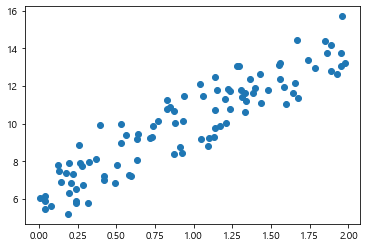

In [4]:
np.random.seed(0)

# y = 4X + 6을 근사(w1 = 4, w0 = 6).임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)  # 100 * 1의 행렬
y = 6 + 4 * X + np.random.randn(100, 1)

# X, y데이터 세트 산점도로 시각화
plt.scatter(X, y)

#### 비용함수 생성

In [5]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

**경사하강법(Gradient Decent)**

In [6]:
X, y

(array([[1.09762701],
        [1.43037873],
        [1.20552675],
        [1.08976637],
        [0.8473096 ],
        [1.29178823],
        [0.87517442],
        [1.783546  ],
        [1.92732552],
        [0.76688304],
        [1.58345008],
        [1.05778984],
        [1.13608912],
        [1.85119328],
        [0.14207212],
        [0.1742586 ],
        [0.04043679],
        [1.66523969],
        [1.5563135 ],
        [1.7400243 ],
        [1.95723668],
        [1.59831713],
        [0.92295872],
        [1.56105835],
        [0.23654885],
        [1.27984204],
        [0.28670657],
        [1.88933783],
        [1.04369664],
        [0.82932388],
        [0.52911122],
        [1.54846738],
        [0.91230066],
        [1.1368679 ],
        [0.0375796 ],
        [1.23527099],
        [1.22419145],
        [1.23386799],
        [1.88749616],
        [1.3636406 ],
        [0.7190158 ],
        [0.87406391],
        [1.39526239],
        [0.12045094],
        [1.33353343],
        [1

In [7]:
# w1과 w0을 업데이트 할 w1_update, w0_update를 반환
def get_weight_update(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화 
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1과 w0을 업데이트 할 w1_update와 w0_update계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [8]:
def gradient_descent_steps(X, y, iters = 10000):
    """
    입력인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트
    """
    # w0과 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해서 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update , w0_update = get_weight_update(w1, w0, X, y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [9]:
w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print("w1 : {0:.3f}  w0 : {1:.3f}".format(w1[0,0], w0[0,0])) # ndarray형태는 이렇게 포맷팅
y_pred = w1[0,0] * X + w0
print("Gradient Descent Total Cost : {0:.4f}".format(get_cost(y, y_pred)))

w1 : 4.022  w0 : 6.162
Gradient Descent Total Cost : 0.9935


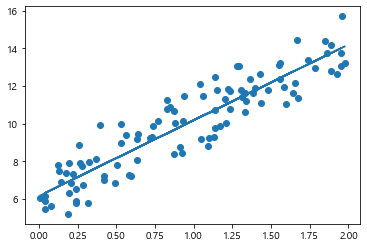

In [10]:
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

**(미니배치)확률적 경사하강법(Stochastic_Gradient_descent_steps)**

In [11]:
np.random.permutation(10)  # 10이하의 숫자

array([9, 2, 1, 4, 8, 6, 5, 0, 7, 3])

In [12]:
np.random.permutation(10).reshape(2,5)

array([[3, 1, 8, 0, 6],
       [2, 5, 9, 7, 4]])

In [13]:
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
    """
    전체 입력데이터로 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장
    대용량의 경우, 미니배치 확률적 경사하강법을 사용함.
    """
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    prev_cost = 10000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        #전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastoc_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastoc_random_index[0: batch_size]]
        sample_y = y[stochastoc_random_index[0: batch_size]]
        
        # 랜덤하게 batch_size만큼 추출된 데이터를 기반으로 w1_update, w0_update계산 후 업데이트 
        w1_update, w0_update  = get_weight_update(w1, w0, sample_X, sample_y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0    

In [14]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


## 5.4 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측
* [사이킷런이 지원하는 다양한 선형모델](https://scikit-learn.org/stable/modules/classes.html#modules-sklearn.linear_model)

### LinearRegression클래스 - Ordinary Least Squares
* LinearRegression클래스는 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS추정방식으로 구현한 클래스
* 이 방식은 입력 피처간의 독립성에 영향을 많이 받아서 입력 피처간의 상관관계가 매우 높은 경우에는 오류에 민감해집니다. 이런 경우를 다중 공선성이라고 합니다.
* 이런 경우는, 상관관계가 높은 피처가 많은 경우 독립적인 중요 피처만 남기고 제거하거나 규제를 적용합니다.
* PCA를 통한 차원 축소도 하나의 방법

### 회귀평가지표
* MAE(Mean Absolute Error) - 실제값과 예측값의 차이를 절대값으로 변환해 평균구함
* MSE(Mean Squared Error) - 실제값과 예측값의 차이를 제곱해 평균한것.
* RSME - MSE값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운것.
* $R^2$ : 분산 기반으로 예측 성능을 평가.1에 가까울수록 예측 정확도가 높다.

### 평가방법
* metrics.mean_absolute_error : `neg_mean_absolute_error`
* metrics.mean_squared_error  : `neg_mean_squared_error`
* metrics.r2_score : $r^2$

### 변수설명
* CRIM - 지역별 범죄 발생률
* ZN - 25,000평방 피트를 초과하는 거주 지역의 비율
* INDUS - 비상업지역 넓이 비율
* CHAS - 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX - 일산화질수 농도
* RM  - 거주할 수 있는 방 개수
* AGE - 1940년 이전에 건축된 소유 주택의 비율
* DIS - 5개 주요 고용센터까지의 가중 거리
* RAD - 고속도로 접근 용이도
* TAX - 10,000달러당 재산세율
* PTRATIO - 지역의 교사와 학생 수 비율
* **B - 지역의 흑인 거주 비율**   <---미국사회의 불편한 진실인가?
* LSTAT - 하위 계층의 비율
* MEDV - 본인 소유의 주택 가격(중앙값)

### 데이터세트 로드 및 관련 패키지 로드

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

In [16]:
# bostome 데이터세트 
boston = load_boston()

In [17]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [18]:
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target

In [19]:
display(bostonDF.shape, bostonDF.head(n = 3), bostonDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


(506, 14)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


None

### 히트맵의 상관도 확인

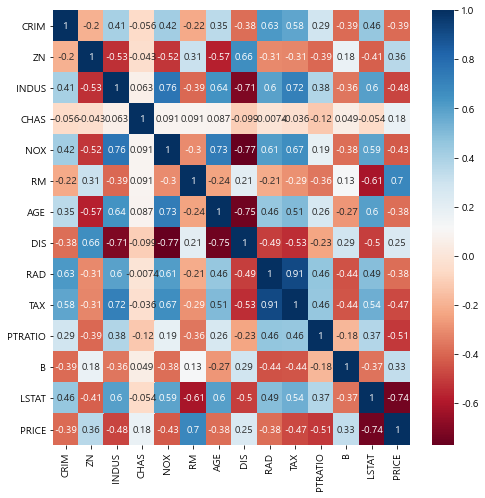

In [20]:
Issue1 = bostonDF.corr()
plt.figure(figsize=(8,8))
sns.heatmap(Issue1, cmap = 'RdBu', annot = True)
plt.show()

***하위계층의 비율이 집값과 음의 상관관계를 가진다. 그것도 매우 높게...***

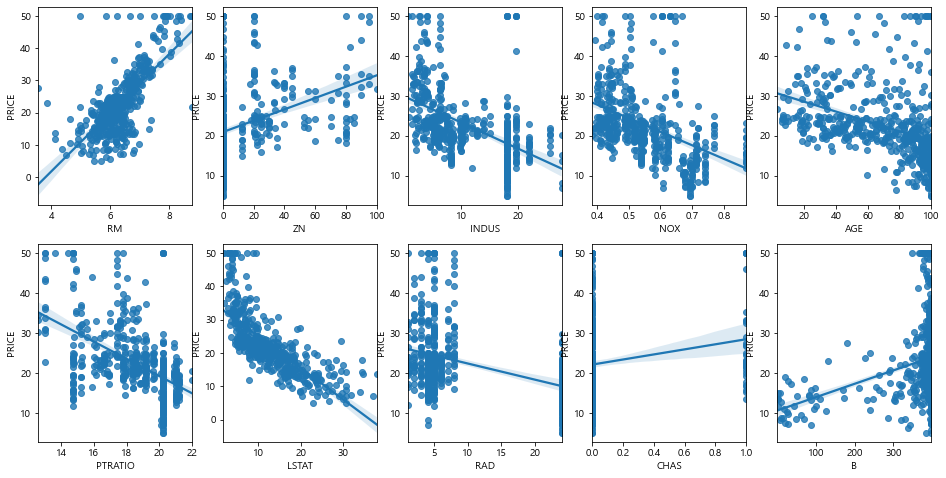

In [21]:
fig, axs = plt.subplots(figsize = (16, 8), nrows = 2, ncols = 5)  # 한 로우에 4개 컬럼씩 , 2행을 생성
lm_features = ['RM', 'ZN','INDUS', 'NOX','AGE', 'PTRATIO', 'LSTAT', 'RAD', 'CHAS', 'B']

for i, feature in enumerate(lm_features):
    row = int(i / 5)
    col = i%5
    
    #print(row, col)
    #시본의 regplot을 이용해 산점도와 선형 회귀직선을 함께 표현
    sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs[row][col])
plt.show()    

**위와 같이 변수가 많은 경우 히트맵과 산점도, 선형회귀직선으로 함께 확인해보자**

### LinearRegression클래스를 이용해 보스턴 주택가격 회귀모델 생셩

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)


X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

# 선형회귀 OLS로 학습/예측 /평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**MSE(Mean Squared Error) and RSME(Residual Squared Mean Error)**

In [23]:
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rsme = np.sqrt(mse)

print("MSE : {0:.3f}, RSME : {1:.3f}".format(mse, rsme))
print("Variance score : {0:.3f}".format(r2_score(y_test, y_preds)))

MSE : 17.297, RSME : 4.159
Variance score : 0.757


In [24]:
print("절편 값 : ", lr.intercept_)
print("회귀 계수값 : ",lr.coef_)

절편 값 :  40.9955951721646
회귀 계수값 :  [-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]


**회귀계수값을 큰 값 순으로 정렬하기 위해 Series로생성하고 sort_values()함수 이용**

In [25]:
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### 5개의 폴드세트에서 cross_val_score()를 이용해 교차검증으로 MSE와 RSME측정

In [26]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
lr = LinearRegression()

# cross_val_score()로 5폴드 세트로 MSE를 구한ㄷ 뒤 이를 기반으로 다시 RSME구함.
neg_mse_scores = cross_val_score(estimator = lr,
                                    X = X_data,
                                    y= y_target,
                                    scoring='neg_mean_squared_error',
                                    cv=5,
                                    )
rsme_scores = np.sqrt(-1 * neg_mse_scores)
avg_rsme = np.mean(rsme_scores)

# cross_val_score(scoring = 'neg_mean_squared_error')로 반환된 값은 음수
print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores, 2))
print("5 folds의 개별 RMSE scores:", np.round(rsme_scores, 2))
print("5 folds의 평균 RSME : {0:.3f}".format(avg_rsme))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RSME : 5.829


## 5.5 다항 회귀와 과(대)적합 / 과소적합의 이해.

* 다항 회귀역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 다항회귀를 구현함.
* 사이킷런에서는 PolyomialFeatures클래스를 통해 피처를 Polynomial(다항식)피처로 변환
* PolynomialFeatures클래스는 degress파라미터를 통해 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환

In [27]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2 * 2 행렬 생성
X = np.arange(4).reshape(-1,2)
print("일차 단항식 계수 피처 : \n", X)

# degeree = 2 인 2차 다항식으로 변환하기 위해 PolyomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수 피처 : \n", poly_ftr)

일차 단항식 계수 피처 : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [28]:
X[:, 0], X[:,1]

(array([0, 2]), array([1, 3]))

In [29]:
2 * X[:,0] , 3 * X[:, 0] ** 2 , 4* X[:,1]**3

(array([0, 4]), array([ 0, 12], dtype=int32), array([  4, 108], dtype=int32))

In [30]:
def polynomial_func(x):
    y = 1 + 2 * X[:,0] + 3 * X[:, 0] ** 2 + 4* X[:,1]**3
    return y

X = np.arange(4).reshape(2, 2)
print("일차 단항식 계수 : \n", X)
y = polynomial_func(X)
print("삼차 다항식 결정값: \n", y)

일차 단항식 계수 : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [31]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print("3차 다항식 계수 feature: \n",poly_ftr)

# Linear Regression에 3차 다항식꼐수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print("Polynomial 회귀계수 \n", np.round(model.coef_, 2))
print("Polynomial 회귀 Shape:", model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


### 사이킷런의 Pipeline객체를 이용해 한 번에 다항 회귀를 구현
* 사이킷런의 Pipline객체는 Feature엔지니어링 변환과 모델 학습 /예측을 순차적으로 결합해 줍니다.

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 피처변환과 다항회귀를 한번에 구현
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


**다항 회귀를 이용한 보스턴 주택가격 예측**

In [33]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np

# 보스톤 데이터세트 로드 
boston = load_boston()

# 보스톤 데이터세트를 데이터프레임변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

#label data 추가
bostonDF['PRICE'] = boston.target
display('보스톤 데이터셋 크기 : ', bostonDF.shape)

X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
y_target = bostonDF['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, \
                                                   test_size = 0.3, random_state = 156)
## pipline을 이용하여 PolynomicalFeatures변환과 LinearRegression적용을 순차적으로 결합
p_model = Pipeline([('poly', PolynomialFeatures(degree = 3, include_bias = False)), ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse  = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print("MSE : {0:.3f}, RSME : {1:.3f}".format(mse, rsme))
print("Variance score : {0:.3f}".format(r2_score(y_test, y_preds)))

'보스톤 데이터셋 크기 : '

(506, 14)

MSE : 79625.594, RSME : 4.159
Variance score : -1116.598


In [34]:
X_train_poly = PolynomialFeatures(degree = 2, include_bias = False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

In [35]:
X_train_poly[:,:10]

array([[2.19770e-01, 0.00000e+00, 6.91000e+00, ..., 6.08770e+00,
        3.00000e+00, 2.33000e+02],
       [7.25800e-01, 0.00000e+00, 8.14000e+00, ..., 3.79650e+00,
        4.00000e+00, 3.07000e+02],
       [5.34120e-01, 2.00000e+01, 3.97000e+00, ..., 2.13980e+00,
        5.00000e+00, 2.64000e+02],
       ...,
       [7.35341e+01, 0.00000e+00, 1.81000e+01, ..., 1.80260e+00,
        2.40000e+01, 6.66000e+02],
       [2.00900e-02, 9.50000e+01, 2.68000e+00, ..., 5.11800e+00,
        4.00000e+00, 2.24000e+02],
       [1.22690e-01, 0.00000e+00, 6.91000e+00, ..., 5.72090e+00,
        3.00000e+00, 2.33000e+02]])

In [36]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
49,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
261,0.53412,20.0,3.97,0.0,0.6470,7.520,89.4,2.1398,5.0,264.0,13.0,388.37,7.26
503,0.06076,0.0,11.93,0.0,0.5730,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
72,0.09164,0.0,10.81,0.0,0.4130,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.12650,25.0,5.13,0.0,0.4530,6.762,43.4,7.9809,8.0,284.0,19.7,395.58,9.50
485,3.67367,0.0,18.10,0.0,0.5830,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58
418,73.53410,0.0,18.10,0.0,0.6790,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88


### 다항회귀를 이용한 과소적합 및 과적합 이해
* [참조사이트](http://scikei-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)
* cosin곡선에 약간의 Noise변동값을 더하여 실제값 곡선을 만듦

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

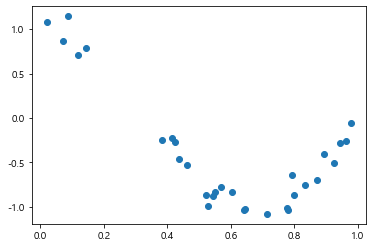

In [38]:
plt.scatter(X, y)

In [39]:
help(PolynomialFeatures)

Help on class PolynomialFeatures in module sklearn.preprocessing._data:

class PolynomialFeatures(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
 |  
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Parameters
 |  ----------
 |  degree : integer
 |      The degree of the polynomial features. Default = 2.
 |  
 |  interaction_only : boolean, default = False
 |      If true, only interaction features are produced: features that are
 |      products of at most ``degree`` *distinct* input features (so not
 |      ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).
 |  
 |  include_bias : boo

* [np.newaxis 참조하러가기](https://azanewta.tistory.com/3)


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87415300e+06  2.03715480e+07
 -1.44872835e+08  7.09313514e+08 -2.47065254e+09  6.24559926e+09
 -1.15676340e+10  1.56894750e+10 -1.54005880e+10  1.06457188e+10
 -4.91377277e+09  1.35919599e+09 -1.70380755e+08] 입니다.
Degree 15 MSE 는 180513241.14 입니다.


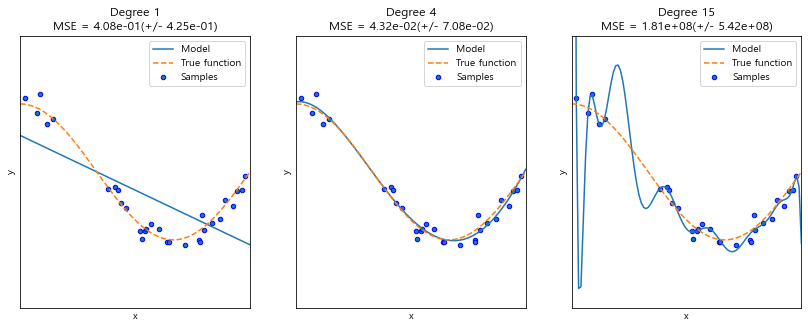

In [40]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

* 좋은 예측모델은 Degree1과 같이 학습데이터의 패턴- 범례에서는 모델-을 지나치게 단순화한 과소적합 모델도 아니고, Degree 15와 같이 모든 학습데이터의 패턴을 하나 하나 감안한 지나치게 복잡한 과적합 모델도 아닌, 학습데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형잡힌 모델을 의미한다.

In [41]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv`

### 편향-분산 트래이드 오프(Bias-Variance Trade off)
* 편향과 분산이 서로 상충관계를 이루면서,오류 비용이 최소로 낮아지는 모델을 구축하는 것이 머신러닝의 핵심

## Regularized Linear Models – Ridge, Lasso
Regularized Linear Model - Ridge Regression
* 주요 파라미터  - $\alpha\$ 이는 릿지회귀의 alpha L2규제

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


# alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mean_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rsme_scores = np.sqrt(-1 * neg_mean_scores)
avg_rsme = np.mean(rsme_scores)


print("5 folds의 개별 Negative MSE scores : ", np.round(neg_mean_scores, 2))
print("5 folds의 개별 RSME scores : ", np.round(rsme_scores, 2))
print("5 folds의 개별 평균  RSME scores: {0:.3f}".format(avg_rsme) )

5 folds의 개별 Negative MSE scores :  [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds의 개별 RSME scores :  [3.38 4.93 5.31 8.64 5.34]
5 folds의 개별 평균  RSME scores: 5.518


* RSME는 작을수록 좋다고 할 수 있지.왜?  잔차오류가 적을수록 정확도가 높은것이니....

* 그렇다면, $\alpha\$ 값을 변경해가면서....RSME값과 회귀계수의 변화를 보자.

In [43]:
# 릿지에 사용딜 알파값 정의
alphas = [0, 0.1, 1,10 ,100]

# alpha list값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge  = Ridge(alpha = alpha)
    
    #cross_val_score를 이용해 5 폴드의 평균 RSME계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rsme = np.mean(np.sqrt(-1 * neg_mse_scores))
    print("alpha {0} 일때 5 폴드의 평균 RSME : {1:.3f}".format(alpha, avg_rsme))

alpha 0 일때 5 폴드의 평균 RSME : 5.829
alpha 0.1 일때 5 폴드의 평균 RSME : 5.788
alpha 1 일때 5 폴드의 평균 RSME : 5.653
alpha 10 일때 5 폴드의 평균 RSME : 5.518
alpha 100 일때 5 폴드의 평균 RSME : 5.330


* $\alpha\$ 값의 변화에 따른 피처의 회귀계수 값을 가로 막대그래프로 시각화

In [44]:
help(ridge)

Help on Ridge in module sklearn.linear_model._ridge object:

class Ridge(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidge)
 |  Ridge(alpha=1.0, *, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
 |  
 |  Linear least squares with l2 regularization.
 |  
 |  Minimizes the objective function::
 |  
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape (n_samples, n_targets)).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, ndarray of shape (n_targets,)}, default=1.0
 |      Regularization strength; must be a positive float. Regu

In [45]:
X_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

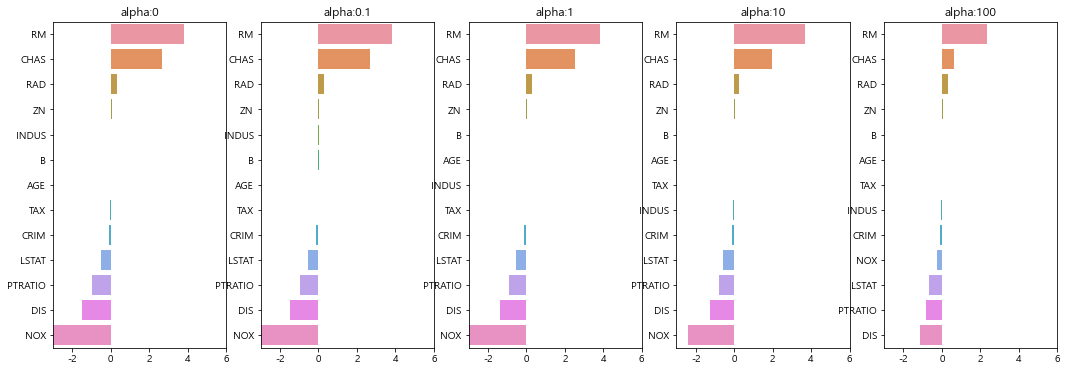

In [46]:
# 각 알파값에 따른 회귀게수값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, ax = plt.subplots(figsize = (18, 6), nrows = 1, ncols = 5) # 로우 1개, 열은 5개

# 각 알파값ㅇ 따른 회귀계수값을 데이터로 저장하기 위한 DataFrame새엉
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    coeff = pd.Series(ridge.coef_, index = X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 알파값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending = False)
    ax[pos].set_title(colname)
    ax[pos].set_xlim(-3, 6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = ax[pos])
    
# for문 바깥에서 맷플롯립의 show호출 및 알파에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [47]:
from IPython.display import Image

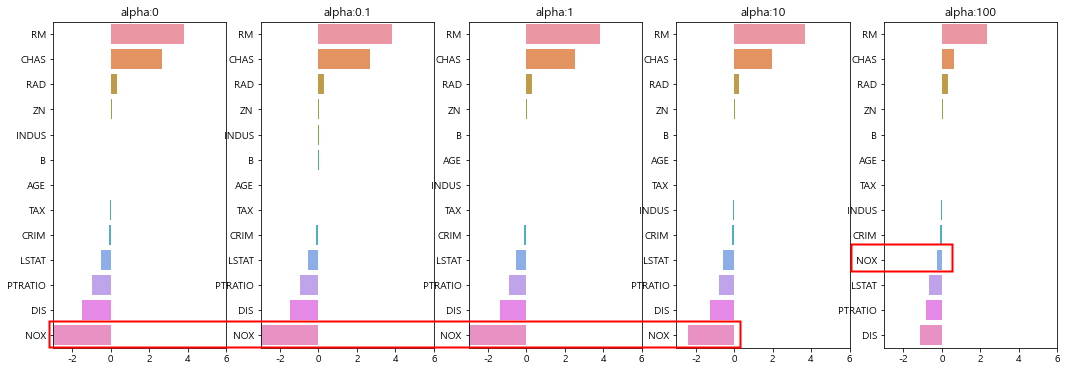

In [48]:
Image("../../img/회귀계수포맷변환_.png")

In [49]:
coeff_df
ridge_alphas = [0, 0.1, 1,10 ,100]
sort_columns = 'alpha:'+str(ridge_alphas[0])
sort_columns

'alpha:0'

In [50]:
# 특정 알파값 기준으로 소팅(alpha:0)
coeff_df.sort_values(by = sort_columns, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


* **Lasso**
* W의 절댓값에 패널치를 부여하는 L1규제를 선형회귀에 적용한 것이 라쏘회귀.즉 L1규제는 $\alpha\ * ||W||_1$ 를 의미하며, 랐 회귀 비용함수의 목표는 RSS(W) + $\alpha|\ * ||W||_1$식을 최소화나는 W를 찾는 것
* L2규제가 회귀 게수의 크기를 감소시키는 데 반해, L1규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거합니다.이런 측면에서 L1규제는 적절한 피처만 회귀에 포함시는 선택의 특성을 가지고있습니다.

In [96]:
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [52]:
help(ElasticNet)

Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |  
 |  Minimizes the objective function::
 |  
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |  
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |  
 |          a * L1 + b * L2
 |  
 |  where::
 |  
 |          alpha = a + b and l1_ratio = a / (a + b)
 |  
 |  The parameter l1_ratio corresponds to alpha in the glmnet R package while
 |  alpha

In [63]:
#라쏘에 사용딜 alpha파라미터의 값을 정의하고 get_linear_reg_eval()함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n= X_data, y_target_n = y_target, verbose = True)

#####  Lasso ######
alpha 0.07 일때 5 폴드 세트의 평균 RSME : 5.330
alpha 0.1 일때 5 폴드 세트의 평균 RSME : 5.330
alpha 0.5 일때 5 폴드 세트의 평균 RSME : 5.330
alpha 1 일때 5 폴드 세트의 평균 RSME : 5.330
alpha 3 일때 5 폴드 세트의 평균 RSME : 5.330


In [64]:
sort_column = 'alpha'+str(lasso_alphas[0])
coeff_df

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.789725,3.703202,2.498212,0.949811,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
DIS,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602


* 회귀계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있다.

* **엘라스틱넷 회귀**
* ElasticNet회귀는 L1규제와 L2규제를 결합한 회귀.따라서 엘라스틱넷 회귀 비용함수의 목표는 $RSS(W) + \alpha2\ * ||W||^2_2 + \alpha1 * ||W||^1_1$ 식을 최소화하는 W를 찾는것.
* 엘라스틱넷은 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 선택하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강합니다.
* 단점은 L1과 L2의 결합으로 인해, 수행시간이 오래 걸린다는 것.
* a * L1 + b * L2  `a`는 L1의 규제 알파값, `b`는 L2의 규제 알파값

In [65]:
# 엘라스틱넷에 사용될 alpha파ㅏ미터의 값들을 정하고 get_linear_reg_eval()함수 호출 
# l1_ratio는 0.7로 고정
elastic_alpha = [0.06, 0.1, 0.5, 1, 3]
coeff_leastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alpha, X_data_n = X_data, y_target_n = y_target)

#####  ElasticNet ######
alpha 0.06 일때 5 폴드 세트의 평균 RSME : 5.330
alpha 0.1 일때 5 폴드 세트의 평균 RSME : 5.330
alpha 0.5 일때 5 폴드 세트의 평균 RSME : 5.330
alpha 1 일때 5 폴드 세트의 평균 RSME : 5.330
alpha 3 일때 5 폴드 세트의 평균 RSME : 5.330


In [66]:
elastic_alpha_cols = 'alpha'+ str(elastic_alpha[0])
coeff_leastic_df.sort_values(by = elastic_alpha_cols, ascending = False)

,alpha0.06,alpha0.1,alpha0.5,alpha1,alpha3
RM,3.626710,3.414154,1.918419,0.938789,0.000000
CHAS,1.467412,0.979706,0.000000,0.000000,0.000000
RAD,0.277897,0.283443,0.300761,0.289299,0.146846
ZN,0.049881,0.050617,0.052878,0.052136,0.038268
B,0.010123,0.010067,0.009114,0.008320,0.007020
AGE,-0.010480,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014392,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044368,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099671,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.538644,-0.000000,-0.000000,-0.000000,-0.000000


## 선형회귀모델을 위한 데이터 변환
* 1) StandardScaler클래스를 이욯나 평균이 0, 분산이 1인 표준정규분포인 데이터세트로 변환
* 2) MinMaxScaler클래스를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화 수행
* 3) 1번), 2번)를 수행한 데이터셋에 다항 특성을 적용하여 변환하는 방법.위의 두 방법으로 변환 후 성능 향상이 없는 경우 진행.
* 4) 로그변환 : 1),2),3)번의 방법으로 성능향상이 이루어지지 않는 경우 사용. `np.log1p()`

In [117]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures

def get_scaled_data(method = 'None', p_degree = None, input_data = None):
    """
    표준정규분포 변환(Standard) 최대값/최소값(Min/Max), 로그변환(np.log1p)결정
    degree값이 있으면, 다항회귀 피처로 변환
    p_degree는 2이상 부여하지 않음.
    """
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [126]:
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 
(506, 13) (506, 13)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 
(506, 104) (506, 13)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 
(506, 13) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 
(506, 104) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMS